# Домашнее задание "Игра престолов"

Часть 1. Анализ и предобработка данных

In [91]:
import pandas as pd
import numpy as np

In [92]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 53.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 35.3MB/s]


In [93]:
train_data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

Покажем первые строки датафрейма

In [94]:
train_data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Датафрейм содержит численные признаки - 18 штук, категориальные данные - 8.

In [95]:
train_data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


In [96]:
train_data.describe(exclude='O').T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Предобработка (очистка) данных

в каких колонках и как часто встречаются NaN значения?

In [97]:
nan_cols = train_data.isnull().sum()
nan_cols

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


Построим гистограмму распределения признака **popularity** с количеством интервалов (bins), равным 50

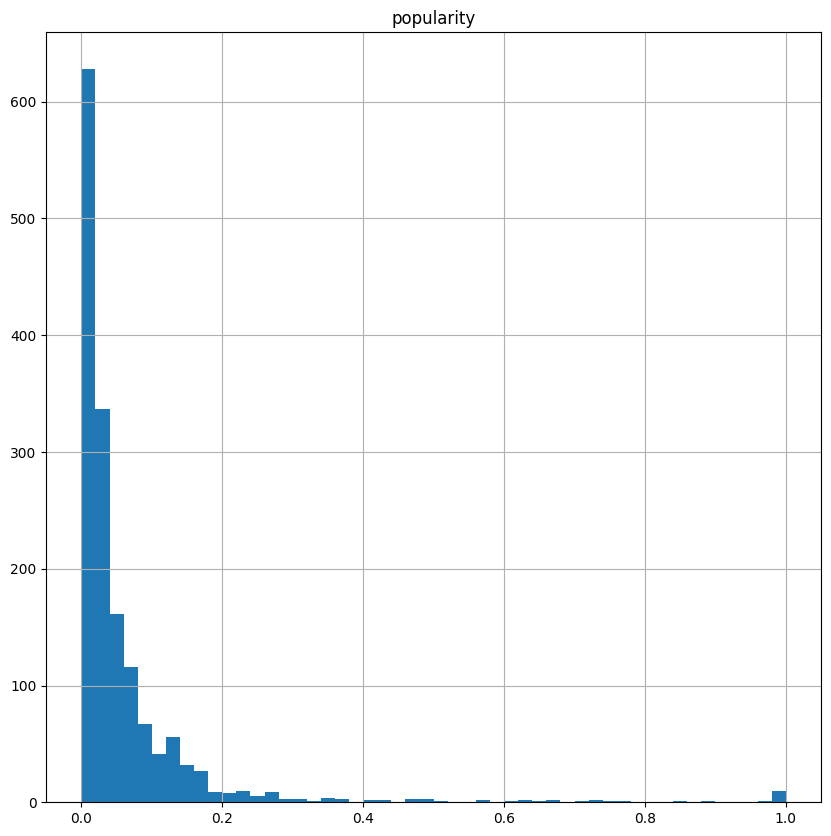

In [98]:
popularity_hist = train_data.hist(column='popularity', bins=50, figsize=(10,10))

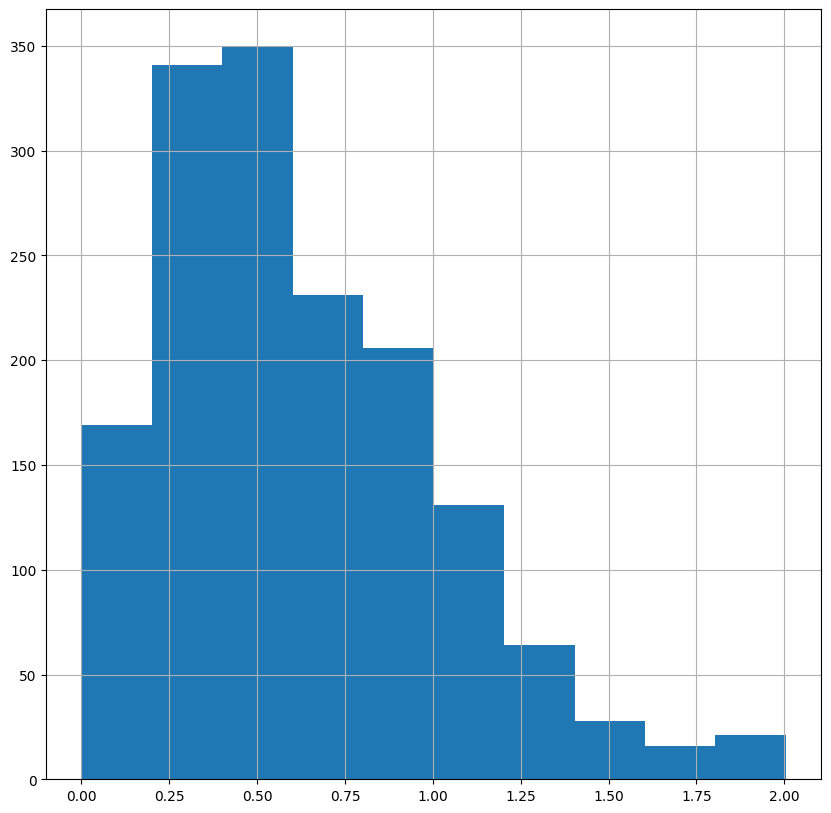

In [99]:
M = 100
log_train_data = np.log10(train_data["popularity"]*M+1)

popularity_hist = log_train_data.hist( figsize=(10,10))

обработаем признак numDeadRelations. Посмотрим на частотное распределение этого признака. Лишь для малого числа персонажей numDeadRelations>0.

array([[<Axes: title={'center': 'numDeadRelations'}>]], dtype=object)

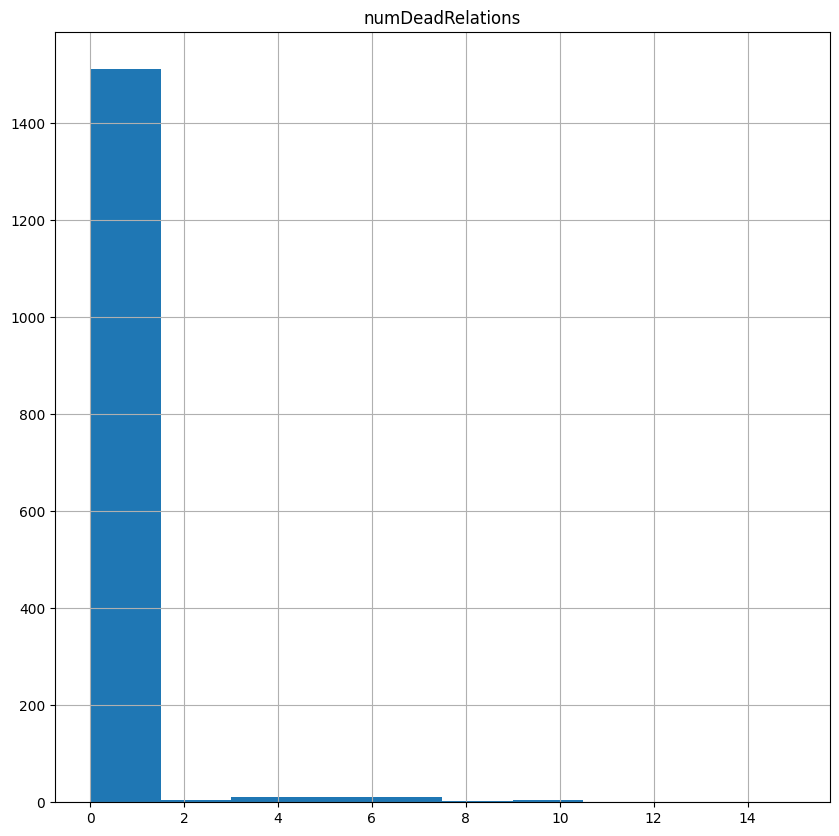

In [101]:
train_data.hist(column='numDeadRelations', figsize=(10,10))

Новый признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.

In [102]:
train_data['boolDeadRelations'] = train_data['numDeadRelations'] > 0

In [103]:
train_data['numDeadRelations'].value_counts()

,count
numDeadRelations,
0,1488
1,24
5,10
7,7
4,7
3,4
10,4
2,4
6,3


Наконец, давайте посмотрим на признак age. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: age_value и age_no_data

Там где возраст указан, age_value принимает значение age, а age_no_data - значение 0.
Там где возраст не указан, age_value принимает значение 0, а age_no_data - значение 1.
Фактически, в переменной age мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак age_no_data, несущий информацию о том, у каких персонажей не был указан возраст:

In [104]:
train_data['age_value'] = [0 if np.isnan(x) else x for x in train_data['age']]
train_data['age_no_data'] = [1 if np.isnan(x) else 0 for x in train_data['age']]

Задание 1.5. Категориальные признаки с большим количеством категорий

In [105]:
train_data['culture'].value_counts(dropna=False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


In [106]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

In [107]:
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
    cultures_grouped_inverted.update({v:k})

Теперь создадим новый столбец с укрупненными значениями culture.

In [108]:
train_data['culture_grouped'] = train_data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию culture_no_data:

In [109]:
train_data['culture_grouped'] = train_data['culture_grouped'].fillna('culture_no_data')


In [110]:
train_data['culture_grouped'].value_counts(dropna=False)

,count
culture_grouped,
culture_no_data,1069
Essos Nations,109
the North,108
the Iron Islands,95
Other Nations,57
Old Nations,32
the Mountain and the Vale,25
Dorne,21
the Rock,14


Задание 1.6. Категориальные признаки в линейных моделях

как мы видим, имена уникальны, их нужно будет дропнуть, в оригинальной культуре было 51 признак, благодаря группировке стало 12.

In [111]:
train_data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [112]:
train_data.describe(include = [np.number]).T[['count', 'min', 'max']].assign(N_unique_values = train_data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.0,2
dateOfBirth,279.0,-25.0,299.0,105
book1,1557.0,0.0,1.0,2
book2,1557.0,0.0,1.0,2
book3,1557.0,0.0,1.0,2
book4,1557.0,0.0,1.0,2
book5,1557.0,0.0,1.0,2
isAliveMother,18.0,0.0,1.0,2
isAliveFather,22.0,0.0,1.0,2
isAliveHeir,21.0,0.0,1.0,2


In [113]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

#train_data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
pd.pivot_table(data = train_data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse,,
0.0,0.619048,42
1.0,0.753165,158
NaN,0.786293,1357


Задание 1.7. Проанализируйте признаки.



date of birth, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse, isMarried, isNoble: разбиваем на две колонки по аналогии с признаком age из предыдущего задания

In [114]:
import pandas as pd

# Обработка бинарных / булевых колонок с пропусками
binary_cols = [
    'dateOfBirth',
    'isAliveMother', 'isAliveFather', 'isAliveSpouse',
    'isMarried', 'isNoble', 'isAliveHeir'
]

for col in binary_cols:
    base = col
    train_data[f'{base}_value'] = train_data[base].fillna(0)
    train_data[f'{base}_no_data'] = train_data[base].isna().astype(int)

# Флаги наличия родственных связей
relation_cols = ['mother', 'father', 'spouse', 'heir', 'title', 'house']
for col in relation_cols:
    train_data[f'has{col.capitalize()}'] = train_data[col].notna().astype(int)

# Удаляем исходные ненужные колонки
drop_cols = (
    ['name', 'culture', 'age'] + binary_cols + relation_cols
)
new_train_data = train_data.drop(columns=drop_cols, errors='ignore')


In [115]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   male                   1557 non-null   int64  
 1   book1                  1557 non-null   int64  
 2   book2                  1557 non-null   int64  
 3   book3                  1557 non-null   int64  
 4   book4                  1557 non-null   int64  
 5   book5                  1557 non-null   int64  
 6   numDeadRelations       1557 non-null   int64  
 7   popularity             1557 non-null   float64
 8   isAlive                1557 non-null   int64  
 9   boolDeadRelations      1557 non-null   bool   
 10  age_value              1557 non-null   float64
 11  age_no_data            1557 non-null   int64  
 12  culture_grouped        1557 non-null   object 
 13  dateOfBirth_value      1557 non-null   float64
 14  dateOfBirth_no_data    1557 non-null   int64  
 15  isAliveMo

все нан обработаны, теперь осталось закодировать культуры

In [116]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_train_data['culture_grouped'] = enc.fit_transform(new_train_data['culture_grouped'])

In [117]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   male                   1557 non-null   int64  
 1   book1                  1557 non-null   int64  
 2   book2                  1557 non-null   int64  
 3   book3                  1557 non-null   int64  
 4   book4                  1557 non-null   int64  
 5   book5                  1557 non-null   int64  
 6   numDeadRelations       1557 non-null   int64  
 7   popularity             1557 non-null   float64
 8   isAlive                1557 non-null   int64  
 9   boolDeadRelations      1557 non-null   bool   
 10  age_value              1557 non-null   float64
 11  age_no_data            1557 non-null   int64  
 12  culture_grouped        1557 non-null   int64  
 13  dateOfBirth_value      1557 non-null   float64
 14  dateOfBirth_no_data    1557 non-null   int64  
 15  isAliveMo

Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [118]:
numeric_cols = new_train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = new_train_data[numeric_cols]
numeric_data.head()


,male,book1,book2,book3,book4,book5,numDeadRelations,popularity,isAlive,age_value,...,isNoble_value,isNoble_no_data,isAliveHeir_value,isAliveHeir_no_data,hasMother,hasFather,hasSpouse,hasHeir,hasTitle,hasHouse
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,11,0.605351,0,0.0,...,0,0,0.0,0,1,1,0,1,0,0
2,1,1,1,1,1,1,1,0.896321,1,97.0,...,1,0,0.0,1,0,0,1,0,1,1
3,1,0,0,0,1,0,0,0.267559,1,0.0,...,1,0,0.0,1,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0.183946,0,23.0,...,1,0,0.0,1,0,0,1,0,1,1
5,0,0,0,0,1,0,0,0.043478,1,29.0,...,1,0,0.0,1,0,0,1,0,1,1


In [119]:
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix.round(2)


,male,book1,book2,book3,book4,book5,numDeadRelations,popularity,isAlive,age_value,...,isNoble_value,isNoble_no_data,isAliveHeir_value,isAliveHeir_no_data,hasMother,hasFather,hasSpouse,hasHeir,hasTitle,hasHouse
male,1.00,0.05,0.02,-0.01,-0.10,0.02,0.03,0.11,-0.15,0.03,...,0.13,NaN,0.08,-0.10,0.09,0.10,-0.09,0.10,0.13,0.02
book1,0.05,1.00,0.28,0.15,-0.01,0.18,0.08,0.19,-0.11,0.04,...,0.04,NaN,-0.04,0.05,-0.04,-0.03,0.02,-0.05,0.05,0.08
book2,0.02,0.28,1.00,0.38,0.10,0.14,-0.00,0.15,-0.06,0.11,...,-0.03,NaN,-0.07,0.08,-0.08,-0.07,0.15,-0.08,-0.05,0.17
book3,-0.01,0.15,0.38,1.00,0.33,0.23,-0.03,0.14,0.02,0.09,...,0.01,NaN,-0.08,0.10,-0.09,-0.10,0.17,-0.10,-0.01,0.16
book4,-0.10,-0.01,0.10,0.33,1.00,0.30,-0.07,0.04,0.28,0.03,...,0.05,NaN,-0.11,0.13,-0.12,-0.14,0.14,-0.13,0.05,0.14
book5,0.02,0.18,0.14,0.23,0.30,1.00,0.03,0.09,0.03,0.05,...,0.07,NaN,-0.07,0.08,-0.08,-0.08,0.07,-0.08,0.07,0.16
numDeadRelations,0.03,0.08,-0.00,-0.03,-0.07,0.03,1.00,0.61,-0.20,0.16,...,0.02,NaN,0.34,-0.54,0.53,0.48,0.13,0.54,0.02,-0.07
popularity,0.11,0.19,0.15,0.14,0.04,0.09,0.61,1.00,-0.19,0.21,...,0.06,NaN,0.47,-0.57,0.62,0.57,0.24,0.57,0.05,0.01
isAlive,-0.15,-0.11,-0.06,0.02,0.28,0.03,-0.20,-0.19,1.00,-0.18,...,-0.06,NaN,-0.10,0.15,-0.16,-0.15,-0.05,-0.15,-0.06,-0.03
age_value,0.03,0.04,0.11,0.09,0.03,0.05,0.16,0.21,-0.18,1.00,...,0.10,NaN,-0.03,0.04,-0.04,-0.04,0.23,-0.04,0.09,0.10


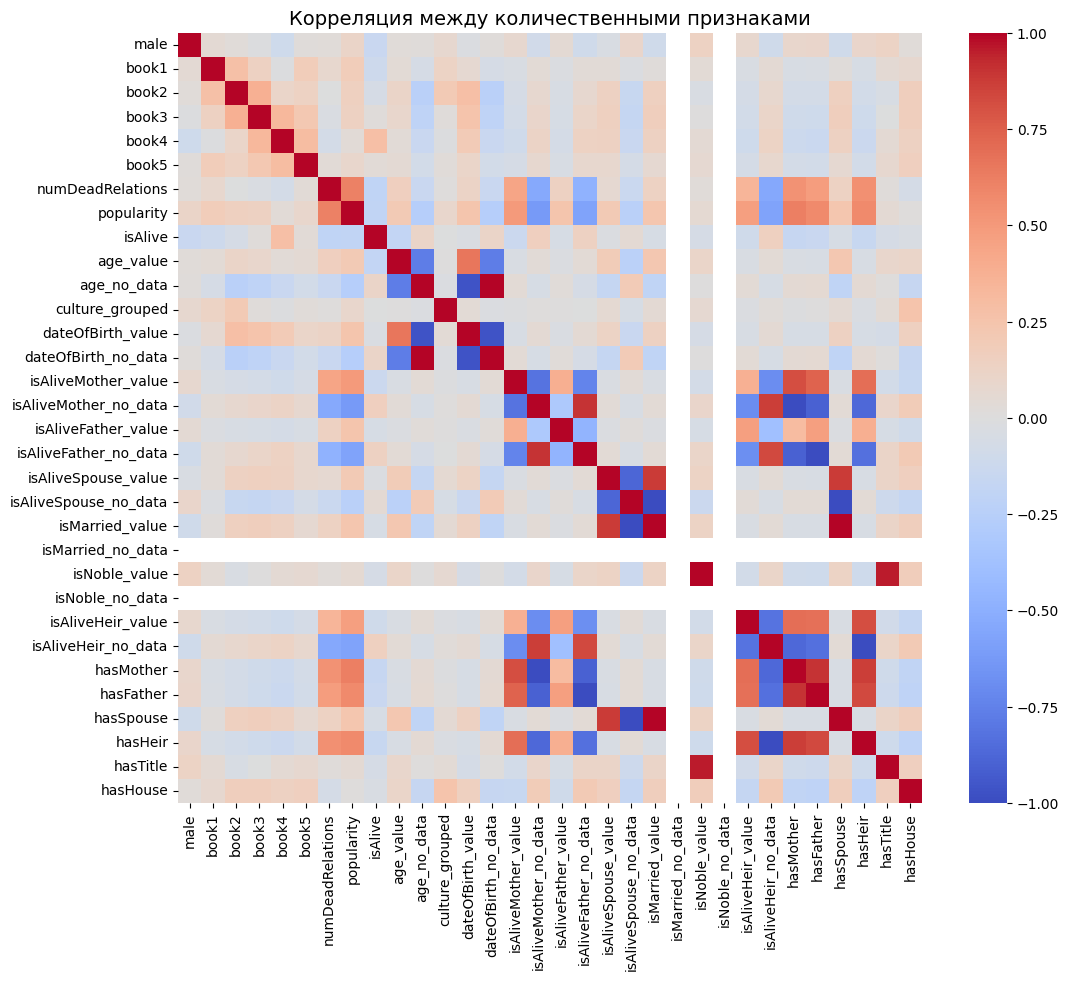

In [120]:
# визуализируем на тепловой карте

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Корреляция между количественными признаками", fontsize=14)
plt.show()


Как видно из корреляционной матрицы, hasMother и hasFather имеют коэффициент 0.9, а если нет информации в isAliveHeir то и информации isAliveMother тоже 0.87 и т.д. Также, признаки об отсутствии брачной связи и наоборот наличии супруга коррелируют отрицательно, как и данные об отстутвии даты рождения и указания наличия возраста. Мы можем сделать вывод, что не все признаки линейно независимы и в идеале для обучения модели было бы правильно сделать селекцию признаков (ну и подбор гиперпарматеров грид серчем, но метрики и так довольно неплохие вышли без этого).

Задание 1.8. Проанализируйте влияние признаков на целевую переменную.

Целевая переменная - isAlive. В тепловой карте видно, что есть положительная корреляция между 4й книгой и isAlive. А также если персонаж мужского пола, популярен, имеет больше связей с дургими мертвыми персонажами, то он скорее всего тоже не жив.

Задание 1.9. Создайте переменные X, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и y, которая будет хранить только значения целевой переменной.

In [121]:
y_train = new_train_data['isAlive']
X_train = new_train_data.drop('isAlive', axis=1)

Задание 1.10. Разделите датасет обучащую и валидационные части (train и val) при помощи функции train_test_split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

  LogisticRegression
  RandomForestClassifier
  AdaBoostClassifier
  GaussianProcessClassifier
  GaussianNB
  KNeighborsClassifier
  SVC
  DecisionTreeClassifier

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Часть 3. Оценим качество модели

Лучшая модель оказалась GaussianProcessClassifier. Сразу за ним - RandomForest, который сам выучивает признаки, важные для предсказания целевой переменной.

In [125]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=5000, solver='lbfgs'),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianProcessClassifier': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} accuracy: {accuracy}")

LogisticRegression accuracy: 0.7980769230769231
RandomForestClassifier accuracy: 0.8076923076923077
AdaBoostClassifier accuracy: 0.8012820512820513
GaussianProcessClassifier accuracy: 0.8237179487179487
GaussianNB accuracy: 0.7692307692307693
KNeighborsClassifier accuracy: 0.8044871794871795
SVC accuracy: 0.7948717948717948


## Тестовый датасет

In [137]:
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

In [138]:
test_data.loc[test_data['age']<0]

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224



data_test.loc[1685, 'dateOfBirth'] = 278. замены в строке 1685: dateOfBirth -> 278. и age -> 0. замены в строке 1869: dateOfBirth -> 299. и age -> 0.

In [139]:
test_data.loc[1685, 'dateOfBirth'] = 278
test_data.loc[1685, 'age'] = 0
test_data.loc[1869, 'dateOfBirth'] = 299
test_data.loc[1869, 'age'] = 0

In [140]:
test_data['culture_grouped'] = test_data['culture'].str.lower().map(cultures_grouped_inverted)
test_data['culture_grouped'] = test_data['culture_grouped'].fillna('culture_no_data')

In [141]:
def preprocess_test(df):
    binary_cols = [
        'dateOfBirth',
        'isAliveMother', 'isAliveFather', 'isAliveSpouse',
        'isMarried', 'isNoble', 'isAliveHeir', 'age',
    ]
    for col in binary_cols:
        df[f'{col}_value'] = df[col].fillna(0)
        df[f'{col}_no_data'] = df[col].isna().astype(int)

    relation_cols = ['mother', 'father', 'spouse', 'heir', 'title', 'house']
    for col in relation_cols:
        df[f'has{col.capitalize()}'] = df[col].notna().astype(int)

    drop_cols = ['name', 'culture', 'age'] + binary_cols + relation_cols
    df['culture_grouped'] = enc.transform(df['culture_grouped'])
    df['boolDeadRelations'] = df['numDeadRelations'] > 0
    return df.drop(columns=drop_cols, errors='ignore')

# вызов
new_test_data = preprocess_test(test_data)


In [159]:
# Проверим соответствие колонок train и test
train_cols = set(X_train.columns)
test_cols  = set(new_test_data.columns)

missing_cols = train_cols - test_cols
extra_cols   = test_cols - train_cols

print("Кол-во колонок в train:", len(train_cols))
print("Кол-во колонок в test :", len(test_cols))
print()

if missing_cols:
    print("Отсутствуют в test_data:")
    for c in sorted(missing_cols):
        print("   ", c)
else:
    print("Все колонки train присутствуют в test_data")

if extra_cols:
    print("\nℹЛишние колонки в test_data (отсутствуют в train):")
    for c in sorted(extra_cols):
        print("   ", c)
else:
    print("\n Нет лишних колонок в test_data")

# 🔹 Добавим недостающие признаки (если есть)
for col in missing_cols:
    test_data[col] = 0


Кол-во колонок в train: 32
Кол-во колонок в test : 32

Все колонки train присутствуют в test_data

 Нет лишних колонок в test_data


In [134]:
new_test_data

,male,book1,book2,book3,book4,book5,numDeadRelations,popularity,culture_grouped,dateOfBirth_value,...,isAliveHeir_value,isAliveHeir_no_data,age_value,age_no_data,hasMother,hasFather,hasSpouse,hasHeir,hasTitle,hasHouse
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0.050167,culture_no_data,156.0,...,0.0,1,100.0,0,0,0,0,0,0,1
1559,0,0,1,1,1,1,0,0.745819,Essos Nations,0.0,...,0.0,1,0.0,1,0,0,0,0,0,1
1560,0,0,0,1,1,0,0,0.010033,culture_no_data,0.0,...,0.0,1,0.0,1,0,0,0,0,0,1
1561,1,1,1,1,1,1,0,0.220736,culture_no_data,0.0,...,0.0,1,0.0,1,0,0,0,0,1,1
1562,1,1,1,1,1,1,0,0.434783,the Isles and Rivers,262.0,...,0.0,1,38.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,0,0.351171,Other Nations,0.0,...,0.0,1,0.0,1,0,0,0,0,0,1
1943,1,0,1,0,1,1,0,0.096990,culture_no_data,0.0,...,0.0,1,0.0,1,0,0,0,0,0,1
1944,1,1,1,1,1,1,0,0.030100,culture_no_data,0.0,...,0.0,1,0.0,1,0,0,0,0,0,0


In [146]:
# Синхронизация колонок test с train
missing_cols = set(X_train.columns) - set(new_test_data.columns)
extra_cols   = set(new_test_data.columns) - set(X_train.columns)

for col in missing_cols:
    new_test_data[col] = 0

new_test_data = new_test_data.drop(columns=extra_cols, errors='ignore')
new_test_data = new_test_data[X_train.columns]  # одинаковый порядок

# Предсказание
y_test_pred = gpc.predict(new_test_data)


In [147]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF


Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.0MB/s]


In [151]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission['isAlive'] = y_test_pred.values
submission.to_csv("/content/new_submission.csv", index=False)